In [7]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline
import scipy.stats as stats

In [8]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [9]:
X
X.shape

(100, 2)

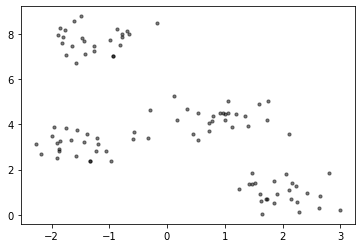

In [10]:
#可視化
plt.scatter(X[:,0],X[:,1],c="black",s=10,alpha=0.5)
plt.show()

【問題1】中心点の初期値を決める
---
入力されたデータから 𝐾 個の中心点 𝜇1 から 𝜇𝐾 の初期値を決めるコードを作成してください。𝐾 は指定したクラスタ数です。
参考資料：


In [11]:
import random
k = 4
idx = np.random.randint(X.shape[0], size=k)
centroids = X[idx,:]
print(centroids)

[[1.59141542 4.90497725]
 [1.85367905 1.5088862 ]
 [2.28809874 0.12954182]
 [0.802314   4.38196181]]


【問題3】クラスタへの割り当て
---
>全てのデータ点 𝑋𝑛 を最も近い中心点 𝜇𝑘 に割り当てるコードを作成してください。
K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル 𝑝,𝑞 に対しては以下の数式で表現できます。
$
\|q-p\| = \sqrt{(q-p)\cdot(q-p)}
$

NumPyにはこの関数が np.linalg.normとして用意されているため使用してください。
https://www.medi-08-data-06.work/entry/kmeans

In [12]:
#距離の二乗が一番近い中心点のインデックスを返す。
idx_min_linalg = np.linalg.norm(X[i,:]-centroids)
print(idx_min_linalg)

NameError: name 'i' is not defined

【問題4】中心点の移動
---
>中心点 𝜇𝑘 を 𝑘 番目のクラスタに割り当てられる全てのデータ点 𝑋𝑛 の平均値（重心）に移動するコードを作成してください。クラスタの割り当て 𝑟𝑛𝑘 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [13]:
#中心の移動
idx_min = np.zeros(X.shape[0])

for i in range(X.shape[0]):
    idx_min[i] = np.argmin(np.sum((X[i,:] - centroids)**2,axis=1)) #最小のインデックスを返す
    for u in range(k):
        centroids[k,:] = X[idx_min==u,:].mean(axis=0)
print(idx_min)
print(centroids)

IndexError: index 4 is out of bounds for axis 0 with size 4

【問題2】SSEを求める関数の作成
---
>クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。
K-meansはこのSSEを最小化する 𝑟𝑛𝑘 と 𝜇𝑘 を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

In [14]:
sse[k] = np.sum((X[idx_min==k,:]-centroids[k,:])**2)#sseの計算
print(sse[k])

IndexError: index 4 is out of bounds for axis 0 with size 4

In [15]:
#関数にまとめる
import random 

def Kmeans(X, K, iter):
    sse = np.zeros(K)
    idx = np.random.randint(X.shape[0], size=K)#適当な初期値を設定
    centroids = X[idx,:]
    print("centroids:{}".format(centroids))
    
    for _ in range(iter):#最小のインデックスを返す
        idx_min = np.zeros(X.shape[0])

        for i in range(X.shape[0]):#中心の移動
            idx_min[i] = np.argmin(np.sum((X[i,:] - centroids)**2,axis=1))
#             print("index_min{}".format(idx_min))
            for k in range(K):
                centroids[k,:] = X[idx_min==k,:].mean(axis=0)
                sse[k] = np.sum((X[idx_min==k,:]-centroids[k,:])**2)#sseの計算
            sse_sum = np.sum(sse)#全てのクラスで合計する
            
    return idx_min,sse_sum

Kmeans(X, K=4, iter=10)

centroids:[[ 0.802314    4.38196181]
 [ 0.16932115  4.19741719]
 [-0.69842598  8.16309188]
 [ 0.96217896  4.51795326]]


<ipython-input-15-1678edd2ebbe>:17: RuntimeWarning: Mean of empty slice.
  centroids[k,:] = X[idx_min==k,:].mean(axis=0)
/Users/harakenken22/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(array([3., 1., 2., 2., 2., 3., 0., 1., 0., 1., 1., 1., 1., 1., 1., 3., 3.,
        0., 0., 3., 2., 1., 0., 3., 0., 0., 0., 2., 3., 3., 3., 1., 3., 3.,
        0., 2., 1., 3., 1., 0., 2., 0., 1., 0., 0., 1., 3., 0., 2., 0., 2.,
        3., 0., 0., 0., 1., 1., 3., 3., 1., 1., 3., 3., 2., 3., 1., 0., 0.,
        3., 2., 1., 3., 2., 1., 2., 2., 0., 0., 3., 3., 3., 1., 0., 2., 3.,
        0., 3., 3., 2., 2., 2., 0., 2., 0., 0., 1., 1., 0., 1., 2.]),
 79.92621426343364)

プレディクトもインクルードしている
---
https://blog.amedama.jp/entry/2017/03/19/160121

【問題7】推定
---
>新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。
データ点 𝑋𝑛 と学習で決まった中心点 𝜇𝑘 に対し、 𝑆𝑆𝐸 を最小化する 𝑟𝑛𝑘 を選ぶ。
具体的には次のことです。
データ点 𝑋𝑛 を最も近い 𝜇𝑘 に割り当てる。

つまり、最初の点から最も近いものにインデックスの点を割り当てる

In [16]:
# def fit_predict(self, feature):
#     """"
#     Args:
#         features(numpy.ndarray):　ラベル付けするデータ
#     Returnns:
#         numpy.ndarray: ラベルデータ
#     行う処理は、各要素から最短距離のセントロイドを基準にラベルを更新すること
#     """
    
#     #要素の中からセントロイド (重心) の初期値となる候補をクラスタ数だけ選び出す
#     feature_indexes = np.arange(len(features)) #連番や等差数列を生成する
#     np.randam.shuffle(feature_indexes)
#     initial_centroid_indexes = feature_indexes[:self.n_clusters]
#     seif.cluster_centers_ = feature[initial_centroid_indexes]
    
#     # ラベル付けした結果となる配列はゼロで初期化しておく

    
    

In [81]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.see_sum = 0
        
#     def centroids(self, X):
#         idx = np.random.randint(X.shape[0], size=self.n_clusters)
#         self.centroids = X[idx,:]
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        
        import random
        sse = np.zeros(self.n_clusters)
        self.idx_min = np.random.randint(X.shape[0], size=self.n_clusters)#適当な初期値を設定
        self.centroids = X[idx,:]
        
        print("centroids:{}".format(centroids))
        
        for _ in range(self.max_iter):#最小のインデックスを返す
            for i in range(X.shape[0]):#中心の移動
                idx_min[i] = np.argmin(np.sum((X[i,:] - self.centroids)**2,axis=1))#セントロイドから最も小さい値のインデックスをとって来ている。
#                 np.append(idx_min, idx_min[i])
                print("index_min{}".format(idx_min))
                for n_cluster in range(self.n_clusters):
                    centroids[n_cluster,:] = X[self.idx_min==n_cluster,:].mean(axis=0)
                    sse[n_cluster] = np.sum((X[self.idx_min==n_cluster,:]-self.centroids[n_cluster,:])**2)#sseの計算
                self.sse_sum = np.sum(sse)#全てのクラスで合計する
                print("self.sse_sum:{}".format(self.sse_sum))
#                 print("self.idx_min:{}".format(self.idx_min))
        return self.idx_min,self.sse_sum
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

In [82]:
ScratchKMeans = ScratchKMeans(n_clusters=4, n_init=4, max_iter=10, tol=1, verbose=False)

In [83]:
ScratchKMeans.fit(X)

centroids:[[ 0.23137626  6.69453546]
 [ 1.85779492  1.26751628]
 [ 2.23022301  0.42888969]
 [-0.76696439  4.75886211]]
index_min[3. 3. 3. 3. 0. 3. 3. 0. 3. 3. 3. 3. 3. 3. 3. 2. 1. 3. 3. 2. 0. 3. 3. 2.
 3. 3. 3. 3. 1. 2. 1. 3. 2. 1. 3. 3. 0. 1. 0. 3. 0. 3. 3. 3. 3. 3. 2. 3.
 3. 3. 3. 1. 3. 3. 3. 3. 0. 1. 1. 0. 3. 1. 1. 0. 1. 0. 3. 3. 1. 3. 3. 1.
 3. 3. 3. 3. 3. 3. 2. 1. 2. 3. 3. 3. 1. 3. 1. 2. 0. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 0. 3.]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 4